## TLDR:
- Datasets can be loaded
- Datasets can (and should) be visualized
- Datasets contain samples which can be referenced by index, similar to an array
- Custom datasets can be created to fit specific data needs
- DataLoaders are used to prepare our data (from Datasets) for training/testing

## Loading our Dataset

In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Download Fashion-MNIST training dataset
training_data = datasets.FashionMNIST(
  root="Fashion-MNIST", # Path to training data
  train=True,           # `True` for training data, `False` for testing data
  download=True,        # Whether to download the data if it isn't available
  transform=ToTensor()  # `transform` specifies feature transformations
                        # `target_transform` specifies label transformations
)

# Download Fashion-MNIST testing dataset
test_data = datasets.FashionMNIST(
  root="Fashion-MNIST", # Path to testing data
  train=False,
  download=True,
  transform=ToTensor()
)

We can download the dataset using PyTorch. In this case, we are downloading the Fashion-MNIST dataset

## Visualizing our Dataset

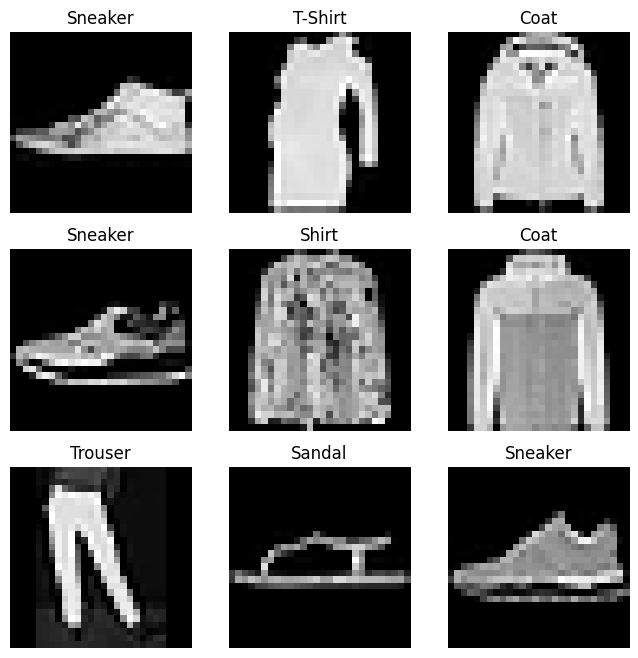

In [2]:
# Create a mapping between labels and the values they
# represent, since all labels are integers in range [0, 9]
labels_map = {
  0: "T-Shirt",
  1: "Trouser",
  2: "Pullover",
  3: "Dress",
  4: "Coat",
  5: "Sandal",
  6: "Shirt",
  7: "Sneaker",
  8: "Bag",
  9: "Ankle Boot",
}

# Create a Pyplot figure visualizing samples from the
# training dataset
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  j = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[j]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Matplotlib (Pyplot) can be used to visualize our dataset

## Creating a Custom Dataset

In [3]:
import pandas as pd
from torch.utils.data import Dataset
from torchvision.transforms import Lambda

# We can create custom datasets, the following are the
# required functions:
class MyPairsDataset(Dataset):
  # `__init__` is called during creation of our dataset
  # and is responsible for initializing the dataset:
  # - Handling of dataset arguments, such as transforms and
  #   paths
  # - Fetching data (or at enough of it)
  def __init__(self, pairs_csv, transform=None, target_transform=None):
    self.pairs = pd.read_csv(pairs_csv) # We can use pandas to read
                                        # csv files
    self.transform = transform
    self.target_transform = target_transform

  # `__len__` is called to get the number of samples in
  # our dataset
  def __len__(self):
    return len(self.pairs)
  
  # `__getitem__` is called to get the `i`th sample
  def __getitem__(self, index):
    [label, feature] = self.pairs.iloc[index]
    if self.transform != None:
      feature = self.transform(feature)
    if self.target_transform != None:
      label = self.target_transform(label)
    return feature, label

# Here, we create an instance of our `MyPairsDataset`:
custom = MyPairsDataset(
  "pairs.csv",                                      # Path to our data
  transform=Lambda(lambda x: x.upper()),            # Function to transform features
  target_transform=Lambda(lambda x: x.capitalize()) # Function to transform labels
)

# Log all samples
for i in range(len(custom)):
  feature, label = custom[i]
  print(f"{label}: {feature}")

Laptop: GREY
Mouse: BLACK
Clock: SILVER
Desk: TEAL
Soda: GREEN
Phone: BLACK
Book: GREEN
Scissors: GREEN
Charger: WHITE


We can create a custom dataset to fit specific data requirements.

Datasets require the following:
- A method to handle initialization
- A method returning the number of samples
- A method that returns samples

# DataLoaders for Training/Testing

In [4]:
from torch.utils.data import DataLoader

# DataLoaders are created to process and reorganize our data
# for training and/or testing
train_dataloader = DataLoader(
  training_data, # The data to be processed
  batch_size=64, # Size of batches of data
  shuffle=True   # Whether or not to shuffle data after every
                 # epoch to prevent overfitting
)

test_dataloader = DataLoader(
  test_data,
  batch_size=64,
  shuffle=True
)

We can create DataLoaders to process and reorganize our data for training and/or testing, allowing us to avoid pitfalls in our training such as overfitting.

## Visualizing our DataLoader

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


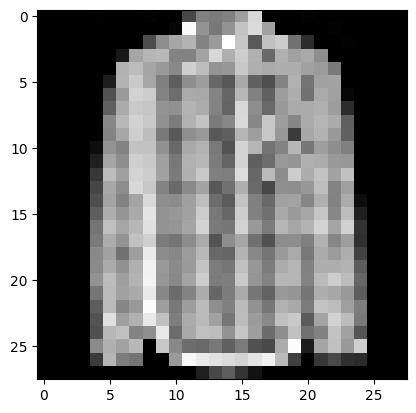

Label: 6


In [5]:
# Iterate one epoch and get batch
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# Visualize our first sample with Pyplot
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

For the sake of understanding, we can visualize our DataLoader.